# Synthetic datasets

In [116]:
import joblib
import pandas as pd
import os
import sys

import sklearn
from sklearn.datasets import make_classification, make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt


In [117]:
random_state = 123

# Train RF model function

In [118]:
def train_rf(X, y, model, output_file):
    
    grid = {'n_estimators': [100, 1000],
            'max_depth': [2, 5, 10], 
            'bootstrap': [True], 
            'oob_score': [True], 
            'max_samples': [0.8],
            'criterion': ['squared_error', 'absolute_error', 'poisson'],
            'max_features': ['auto','sqrt','log2']
           }
    
    # if is classifier, change the criterion:
    if isinstance(model, sklearn.ensemble.RandomForestClassifier):
        grid['criterion'] = ['gini', 'entropy']
        
    grid_model = GridSearchCV(model, grid, cv=5, verbose=1)
    grid_model.fit(X, y)
    rf = grid_model.best_estimator_

    print('Parameters of best prediction model:')
    print(grid_model.best_params_)
    print('OOB accuracy of prediction model:')
    print(rf.oob_score_)
    
    joblib.dump(rf, open(output_file, 'wb'))

# make_classification

## One informative feature, one cluster per class

Number of features = 2 \
Number of samples = 100

In [76]:
X, Y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=1, n_classes = 2, 
                             n_clusters_per_class=1, class_sep=2, random_state = random_state)

In [77]:
colnames = ['X' + str(i) for i in range(1, X.shape[1] + 1)]
data = pd.DataFrame(X, columns=colnames)
data['target'] = Y
data.to_csv('data_make_classif_1.csv', index=False)

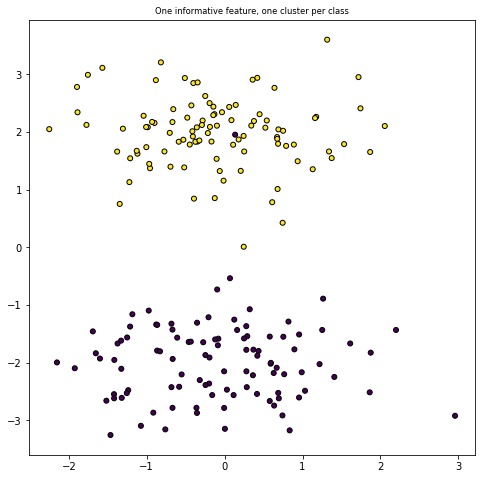

In [78]:
# Plot
plt.figure(figsize=(8, 8))

plt.title("One informative feature, one cluster per class", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")
plt.show()

Run and scroll down to see the accuracy:

In [79]:
classifier = RandomForestClassifier(oob_score=True, random_state=42)
output_file = os.path.join('./random_forest_make_classif_1.joblib')

train_rf(X, Y, classifier, output_file)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Parameters of best prediction model:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_samples': 0.8, 'n_estimators': 100, 'oob_score': True}
OOB accuracy of prediction model:
0.995


{'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_samples': 0.8, 'n_estimators': 100, 'oob_score': True}

OOB accuracy of prediction model:
0.995

## 10/10 informative features, two clusters per class, smaller separation value

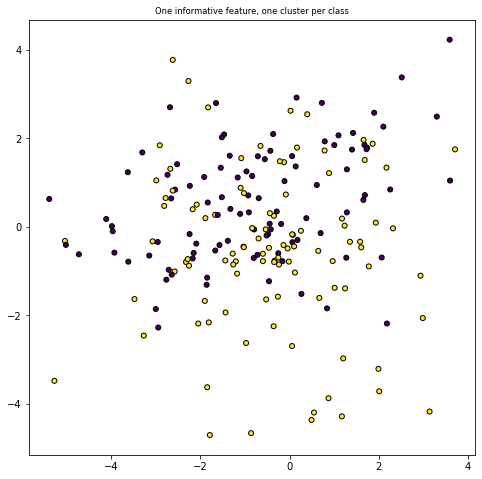

In [130]:
X, Y = make_classification(n_samples=200, n_features=10, n_redundant=0, n_informative=10, n_classes = 2, 
                             n_clusters_per_class=2, class_sep=0.5, random_state = random_state)

colnames = ['X' + str(i) for i in range(1, X.shape[1] + 1)]
data = pd.DataFrame(X, columns=colnames)
data['target'] = Y
data.to_csv('data_make_classif_2.csv', index=False)

# Plot first 2
plt.figure(figsize=(8, 8))

plt.title("One informative feature, one cluster per class", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")
plt.show()

In [131]:
classifier = RandomForestClassifier(oob_score=True, random_state=42)
output_file = os.path.join('./random_forest_make_classif_2.joblib')

train_rf(X,Y, classifier, output_file)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Parameters of best prediction model:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_samples': 0.8, 'n_estimators': 1000, 'oob_score': True}
OOB accuracy of prediction model:
0.83


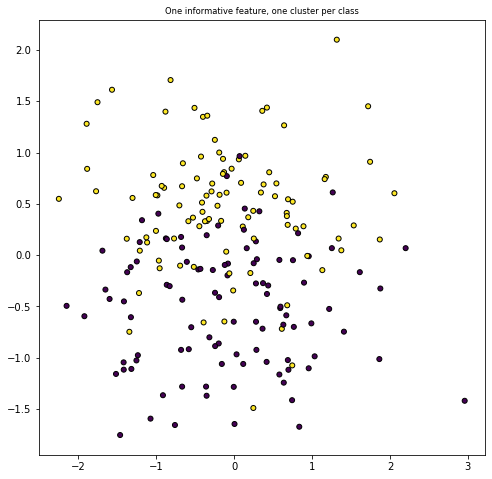

In [135]:
X, Y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=1, n_classes = 2, 
                             n_clusters_per_class=1, class_sep=0.5, random_state = random_state)

# Plot
plt.figure(figsize=(8, 8))

plt.title("One informative feature, one cluster per class", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")
plt.show()

In [143]:
module_path

'/Users/helena.pelin/Desktop/Workmap/Projects/FGC/Code/fg-clustering/fgclustering'

In [144]:
import os
import sys
module_path = os.path.abspath(os.path.join('../fgclustering/'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [160]:
from fgclustering import *
from forest_guided_clustering import FgClustering

ModuleNotFoundError: No module named 'fgclustering.utils'

In [159]:
fgclustering.forest_guided_clustering.FgClustering(model=model,data=data,target_column='target')

AttributeError: module 'fgclustering' has no attribute 'forest_guided_clustering'